In [1746]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
import matplotlib.dates as mdates
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew
from scipy.stats import poisson
from scipy.stats import norm
sns.set(color_codes=True)

# DATA PREPARATION AND VISUALISATION

## EXPLORATORY DATA ANALYSIS:

In [1795]:
df=pd.read_csv("exp.csv")

In [1797]:
df.head()

,Statistic Label,Month,Residency,Expenditure Type,UNIT,VALUE
0,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Fare,Euro Million,19.6
1,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Prepayments,Euro Million,1.0
2,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Accommodation,Euro Million,13.5
3,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Day-to-Day Expenditure,Euro Million,45.1
4,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",All Travel Expenditure,Euro Million,79.2


In [1799]:
#Checking the type of data
df.dtypes

Statistic Label      object
Month                object
Residency            object
Expenditure Type     object
UNIT                 object
VALUE               float64
dtype: object

In [1801]:
df.info() #summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Statistic Label   1950 non-null   object 
 1   Month             1950 non-null   object 
 2   Residency         1950 non-null   object 
 3   Expenditure Type  1950 non-null   object 
 4   UNIT              1950 non-null   object 
 5   VALUE             1950 non-null   float64
dtypes: float64(1), object(5)
memory usage: 91.5+ KB


In [1803]:
df.shape #finding dimensions

(1950, 6)

In [1805]:
#summary statistics for the numeric columns
df.describe()

,VALUE
count,1950.000000
mean,232.256718
std,406.888667
min,0.200000
25%,25.100000
50%,57.600000
75%,258.000000
max,3185.000000


In [1807]:
#Unique values in Statistic Label
unique_Stat_Label = df['Statistic Label'].unique()

In [1809]:
unique_Stat_Label

array(['Expenditure of Overnight Foreign Visitors',
       'Percentage of Expenditure of Overnight Foreign Visitors',
       'Mean Expenditure of Overnight Foreign Visitors'], dtype=object)

In [1811]:
#Unique values in Residency
unique_residency = df['Residency'].unique()

In [1813]:
unique_residency

array(['Great Britain (England, Scotland & Wales)', 'Other Europe (3)',
       'USA & Canada', 'Other Residencies', 'All Residencies'],
      dtype=object)

In [1815]:
#Unique values in Expenditure Type
unique_exp_type=df['Expenditure Type'].unique()

In [1817]:
unique_exp_type

array(['Fare', 'Prepayments', 'Accommodation', 'Day-to-Day Expenditure',
       'All Travel Expenditure'], dtype=object)

In [1819]:
df.isnull().sum()

Statistic Label     0
Month               0
Residency           0
Expenditure Type    0
UNIT                0
VALUE               0
dtype: int64

In [1821]:

df.groupby("Statistic Label")["VALUE"].describe()

,count,mean,std,min,25%,50%,75%,max
Statistic Label,,,,,,,,
Expenditure of Overnight Foreign Visitors,650.0,99.156000,144.843562,0.2,18.800,47.35,120.90,1097.6
Mean Expenditure of Overnight Foreign Visitors,650.0,557.613846,560.660550,3.0,164.250,415.00,725.75,3185.0
Percentage of Expenditure of Overnight Foreign Visitors,650.0,40.000308,32.901367,0.4,19.525,31.50,46.30,100.0


In [1823]:
# Get the count of unique values in the 'Residency' column
residency_counts = df['Residency'].value_counts()

# Get the count of unique values in the 'Expenditure Type' column
exp_type_counts = df['Expenditure Type'].value_counts()

# Print the counts
print("Residency Value Counts:")
print(residency_counts)

print("\nExpenditure Type Value Counts:")
print(exp_type_counts)


Residency Value Counts:
Residency
Great Britain (England, Scotland & Wales)    390
Other Europe (3)                             390
USA & Canada                                 390
Other Residencies                            390
All Residencies                              390
Name: count, dtype: int64

Expenditure Type Value Counts:
Expenditure Type
Fare                      390
Prepayments               390
Accommodation             390
Day-to-Day Expenditure    390
All Travel Expenditure    390
Name: count, dtype: int64


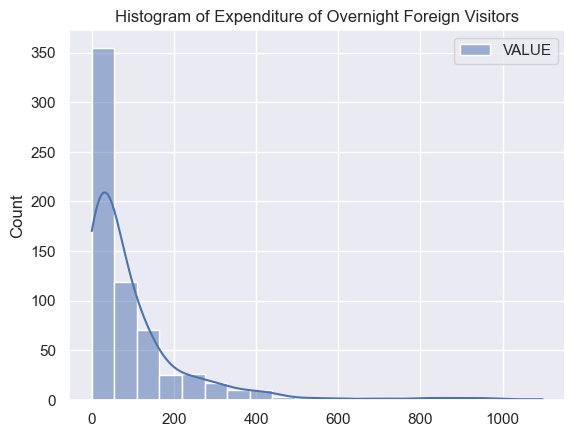

In [1825]:

# Histogram for numerical data
df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors'
sns.histplot(df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors'], kde=True, bins=20)
plt.title('Histogram of Expenditure of Overnight Foreign Visitors')
plt.show()


The histogram is right skewed. Most of the data is clustered towards the lower end, but there is a long tail extending towards the higher values. This means there are a small number of observations with very high expenditures.

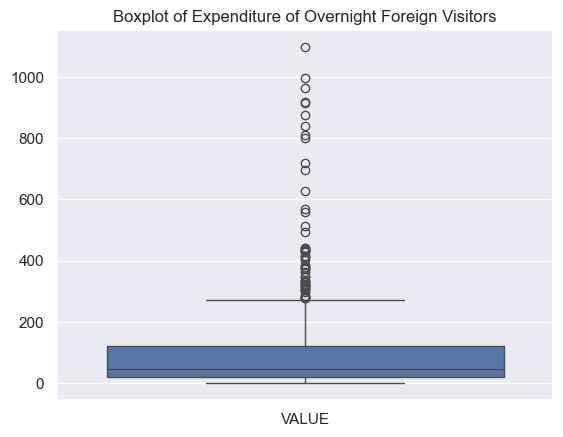

In [1828]:
sns.boxplot(df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors'])
plt.title('Boxplot of Expenditure of Overnight Foreign Visitors')
plt.show()


In the above plot for ‘Expenditure of Overnight Foreign Visitors’, there are significant outliers, showing values that are significantly different from the majority of the data, Outliers above the upper whisker typically indicate extremely high-spending visitors.

In [1831]:
# Cross-tabulation between Residency and Expenditure Type
cross_tab = pd.crosstab(df['Residency'], df['Expenditure Type'])


In [1833]:
cross_tab
#It helps to observe the frequency of each category combination and analyze the distribution of Expenditure Type across Residency groups.

Expenditure Type,Accommodation,All Travel Expenditure,Day-to-Day Expenditure,Fare,Prepayments
Residency,,,,,
All Residencies,78,78,78,78,78
"Great Britain (England, Scotland & Wales)",78,78,78,78,78
Other Europe (3),78,78,78,78,78
Other Residencies,78,78,78,78,78
USA & Canada,78,78,78,78,78


In [1835]:
# Correlation matrix
# Filter the dataset for the relevant expenditure columns
df_filterdata = df[df['Statistic Label'].isin([
    'Expenditure of Overnight Foreign Visitors', 
    'Mean Expenditure of Overnight Foreign Visitors'
])]

# Pivot the dataframe to have both variables in columns
df_pivotdata = df_filterdata.pivot_table(index=['Month'], 
                                   columns='Statistic Label', 
                                   values='VALUE').reset_index()

# Calculate the correlation matrix
correlation_matrix_cal = df_pivotdata[['Expenditure of Overnight Foreign Visitors', 
                               'Mean Expenditure of Overnight Foreign Visitors']].corr()

correlation_matrix_cal



Statistic Label,Expenditure of Overnight Foreign Visitors,Mean Expenditure of Overnight Foreign Visitors
Statistic Label,,
Expenditure of Overnight Foreign Visitors,1.000000,0.785483
Mean Expenditure of Overnight Foreign Visitors,0.785483,1.000000


The above matrix shows that expenditure and mean expenditure are highly correlated. We can choose any one of them for analysis.

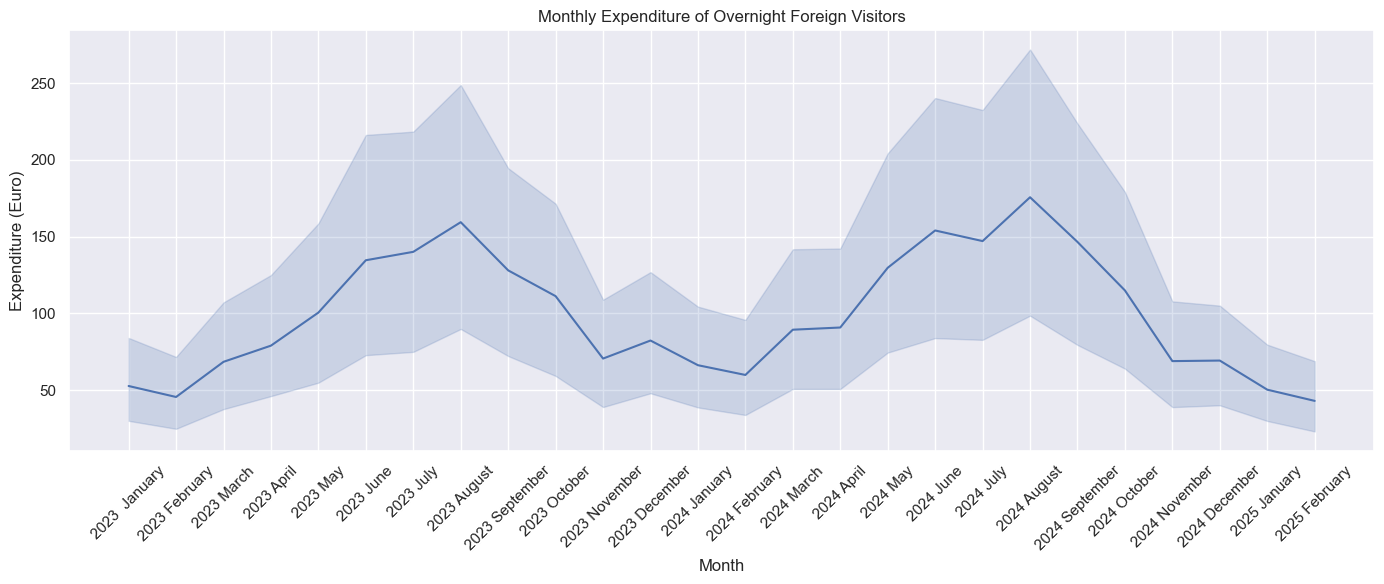

In [1840]:
#Line plot
# Filter the data for the specific expenditure type
monthly_exp = df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors']

# Convert 'Month' to datetime if not already
#monthly_exp['Month'] = pd.to_datetime(monthly_exp['Month'], errors='coerce')

# Drop rows where datetime conversion failed
#onthly_exp = monthly_exp.dropna(subset=['Month'])

# Sort by Month
#monthly_exp = monthly_exp.sort_values(by='Month')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_exp, x='Month', y='VALUE')
plt.title('Monthly Expenditure of Overnight Foreign Visitors')
plt.xlabel('Month')
plt.ylabel('Expenditure (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This shows the trend for monthly Expenditure of Overnight Foreign Visitors. We can see that the highest expenditure occurs in August 2003 and August 2004. 

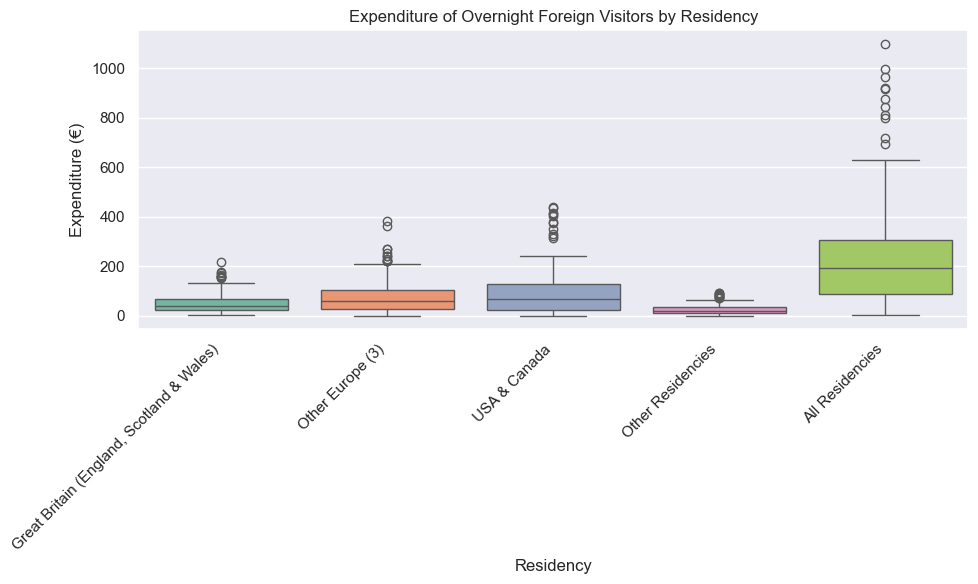

In [1843]:

# Filter for the desired statistic
exp_data = df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors']

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Residency', y='VALUE', hue='Residency', data=exp_data, palette='Set2', legend=False)
plt.title('Expenditure of Overnight Foreign Visitors by Residency')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Expenditure (€)')
plt.xlabel('Residency')
plt.tight_layout()
plt.show()

The above figure shows the highest expenditure with All residencies and highest number of outliers. Since this is an aggregate we can remove this category for further analysis. Besides this, we see the highest expenditure from residents of the USA and Canada.


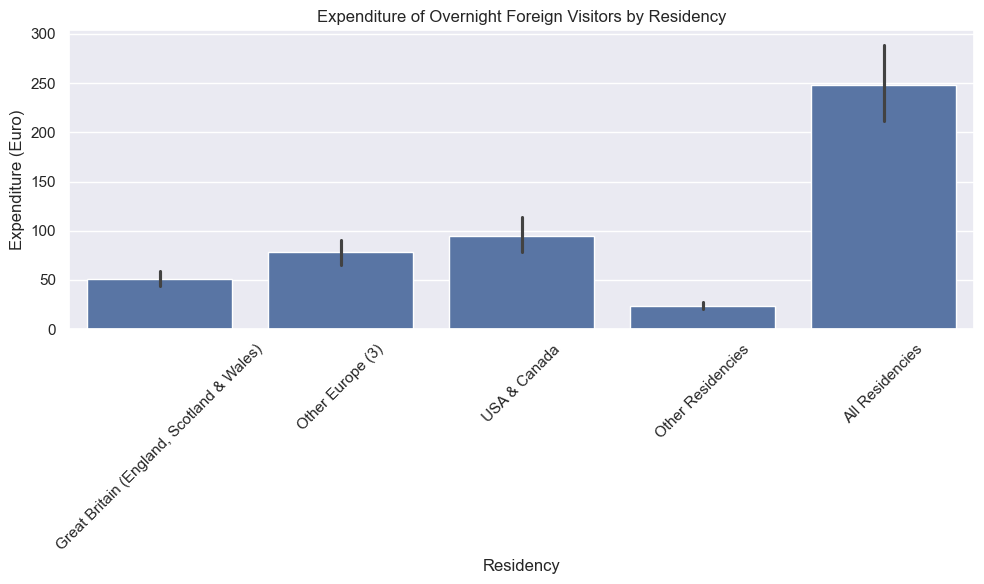

In [1846]:

# Filter for only the expenditure 
exp_data = df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors']

# Plot barplot with standard deviation as error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Residency', y='VALUE', data=exp_data, errorbar=('ci',95))
plt.title('Expenditure of Overnight Foreign Visitors by Residency')
plt.xlabel('Residency')
plt.ylabel('Expenditure (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In the above plot, bars represent the mean expenditure for each group while error bars (95% ci) represent the confidence interval, giving a sense of variation and reliability in the mean expenditure.
The height of each bar tells us which residency group spends more on average during overnight visits. For example, in the above plot, USA & Canada category has the tallest bar which suggests that visitors from those areas tend to spend more. Although the ‘All Residencies’ category has the highest bar, however, since it is just showing an aggregate therefore, we can drop it in further analysis later. 

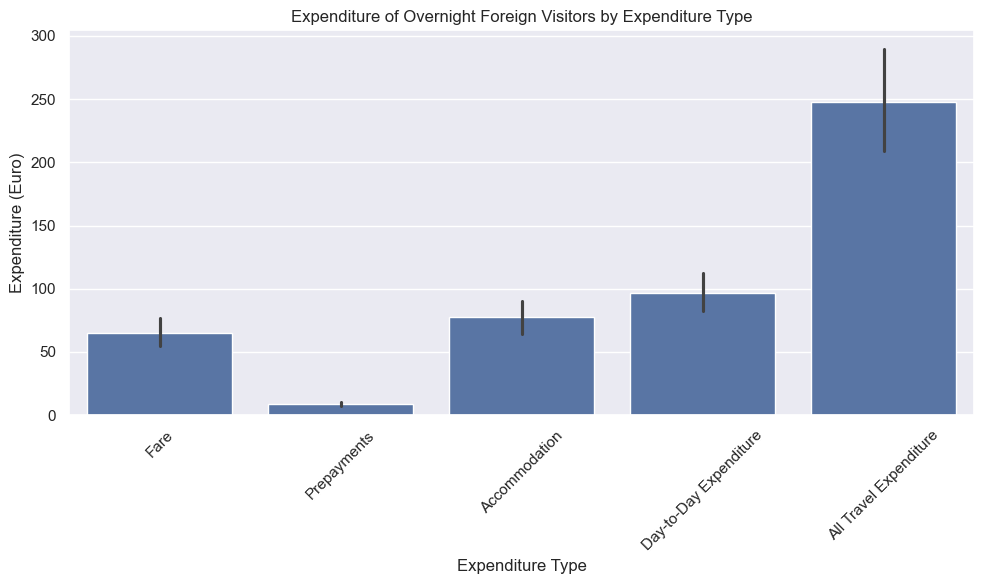

In [1849]:

# Filter for only the expenditure 
exp_data = df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors']

# Plot barplot with standard deviation as error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Expenditure Type', y='VALUE', data=exp_data, errorbar=('ci',95))
plt.title('Expenditure of Overnight Foreign Visitors by Expenditure Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Expenditure (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The height of each bar tells us which expenditure type contributes to more expenditure. For example, in the above plot, All Travel Expenditure category has the tallest bar which suggests that visitors tend to spend more in this category.

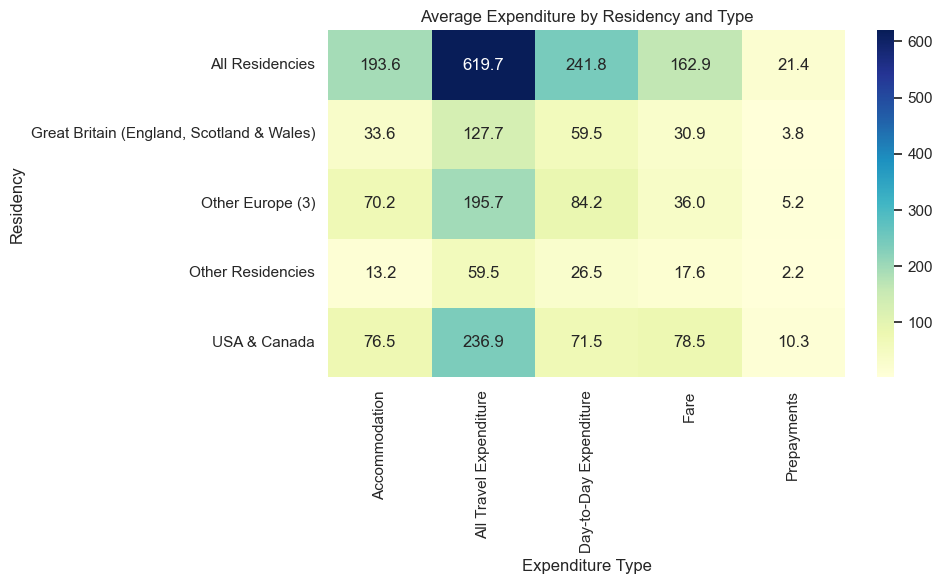

In [1852]:
#Plotting heatmap
# Step 1: Filter the relevant statistic
df_heat = df[df['Statistic Label'] == 'Expenditure of Overnight Foreign Visitors']

# Step 2: Create pivot table for heatmap
pivot = df_heat.pivot_table(
    values='VALUE', 
    index='Residency', 
    columns='Expenditure Type', 
    aggfunc='mean'
)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Expenditure by Residency and Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Residency')
plt.tight_layout()
plt.show()



Heatmap is a way to see how different features are correlated. The above plot shows apart from All Residencies, USA and Canada and All Travel Expenditure categories are highly correlated. This means that people from these area spend more on All Travel Expenditures. 

## DATA PREPARATION:

In [1856]:
# Step 1: Combine Statistic Label with Unit for clearer column headers
df['Stat_Unit'] = df['Statistic Label'] + ' (' + df['UNIT'] + ')'

# Step 2: Pivot the table
df_wide = df.pivot_table(
    index=['Month', 'Residency', 'Expenditure Type'],
    columns='Stat_Unit',
    values='VALUE',
    aggfunc='first'  # if duplicates exist, take the first
).reset_index()

# Step 3: Flatten the column names (optional if you get a multi-index)
df_wide.columns.name = None  # remove the name of the columns axis


In [1858]:
df_wide.to_csv("cleaned_exp_data.csv", index=False)
df_wide.head()

,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
0,2023 January,All Residencies,Accommodation,65.4,164.0,19.9
1,2023 January,All Residencies,All Travel Expenditure,329.5,824.0,100.0
2,2023 January,All Residencies,Day-to-Day Expenditure,162.0,405.0,49.2
3,2023 January,All Residencies,Fare,98.4,246.0,29.9
4,2023 January,All Residencies,Prepayments,3.6,9.0,1.1


In [1860]:
print(df_wide.columns)


Index(['Month', 'Residency', 'Expenditure Type',
       'Expenditure of Overnight Foreign Visitors (Euro Million)',
       'Mean Expenditure of Overnight Foreign Visitors (Euro)',
       'Percentage of Expenditure of Overnight Foreign Visitors (%)'],
      dtype='object')


In [1862]:
df_wide.shape

(650, 6)

In [1864]:
#check null or missing values
df_wide.isnull().sum()

Month                                                          0
Residency                                                      0
Expenditure Type                                               0
Expenditure of Overnight Foreign Visitors (Euro Million)       0
Mean Expenditure of Overnight Foreign Visitors (Euro)          0
Percentage of Expenditure of Overnight Foreign Visitors (%)    0
dtype: int64

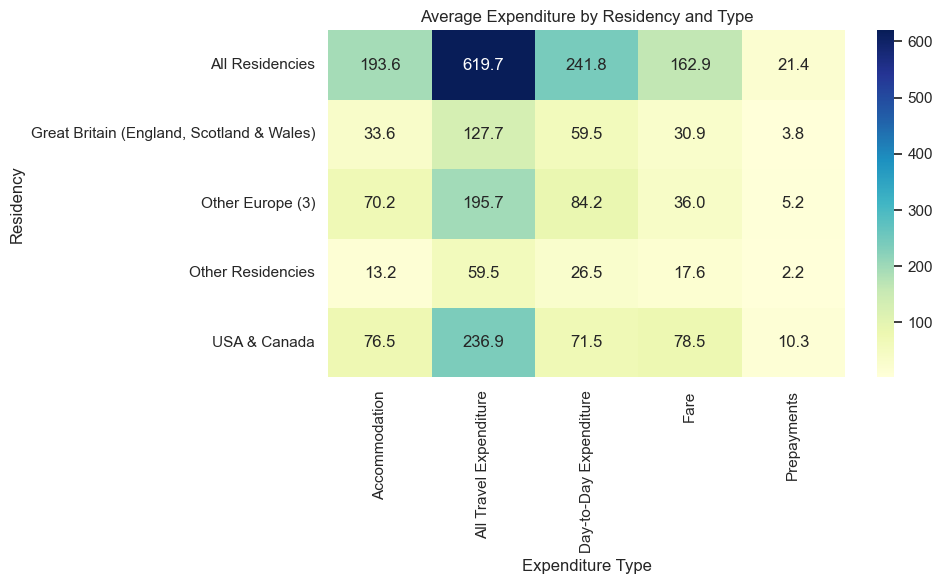

In [1866]:
# Pivot using the wide DataFrame
pivot = df_wide.pivot_table(
    values='Expenditure of Overnight Foreign Visitors (Euro Million)',
    index='Residency',
    columns='Expenditure Type',
    aggfunc='mean'
)
#Here we need to pivot our data for plotting and analysis
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Expenditure by Residency and Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Residency')
plt.tight_layout()
plt.show()

The line sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.1f') creates a heatmap using Seaborn with the following features:
pivot: The DataFrame used for the heatmap (must be 2D with numerical values).
annot=True: Annotates each cell with the numeric value.
cmap='YlGnBu': Uses a yellow-green-blue color gradient for better visual distinction.
fmt='.1f': Formats the annotated numbers to 1 decimal place.

Here, we observe that 'All Residencies' represents an aggregate summary rather than distinct analytical data, so it can be excluded from the analysis.

In [1869]:
# Now, remove the unwanted Residency categories after pivoting
df_wide_filtered = df_wide[~df_wide['Residency'].isin(['All Residencies'])]

# If you want to remove the column name
df_wide_filtered.columns.name = None

In [1871]:
df_wide_filtered.head()

,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
5,2023 January,"Great Britain (England, Scotland & Wales)",Accommodation,13.5,86.0,17.0
6,2023 January,"Great Britain (England, Scotland & Wales)",All Travel Expenditure,79.2,508.0,100.0
7,2023 January,"Great Britain (England, Scotland & Wales)",Day-to-Day Expenditure,45.1,289.0,56.9
8,2023 January,"Great Britain (England, Scotland & Wales)",Fare,19.6,126.0,24.8
9,2023 January,"Great Britain (England, Scotland & Wales)",Prepayments,1.0,6.0,1.3


In [1873]:
df_wide_filtered.shape

(520, 6)

In [1875]:
# Filter out the rows where the 'Month' is 'January 2025' or 'February 2025'
df_filterednew = df_wide_filtered[~df_wide_filtered['Month'].isin(['2025 January', '2025 February'])]
# This will remove the rows where the month is January or February 2025


In [1877]:
df_filterednew.shape

(480, 6)

In [1879]:
df_filterednew.head()

,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
5,2023 January,"Great Britain (England, Scotland & Wales)",Accommodation,13.5,86.0,17.0
6,2023 January,"Great Britain (England, Scotland & Wales)",All Travel Expenditure,79.2,508.0,100.0
7,2023 January,"Great Britain (England, Scotland & Wales)",Day-to-Day Expenditure,45.1,289.0,56.9
8,2023 January,"Great Britain (England, Scotland & Wales)",Fare,19.6,126.0,24.8
9,2023 January,"Great Britain (England, Scotland & Wales)",Prepayments,1.0,6.0,1.3


In [1881]:
df_filterednew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 5 to 599
Data columns (total 6 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Month                                                        480 non-null    object 
 1   Residency                                                    480 non-null    object 
 2   Expenditure Type                                             480 non-null    object 
 3   Expenditure of Overnight Foreign Visitors (Euro Million)     480 non-null    float64
 4   Mean Expenditure of Overnight Foreign Visitors (Euro)        480 non-null    float64
 5   Percentage of Expenditure of Overnight Foreign Visitors (%)  480 non-null    float64
dtypes: float64(3), object(3)
memory usage: 26.2+ KB


In [1883]:
# Summary statistics for numerical columns
df_filterednew.describe()

,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
count,480.000000,480.000000,480.000000
mean,64.705000,587.179167,39.999792
std,75.233149,597.895234,32.962078
min,0.200000,3.000000,0.400000
25%,16.000000,159.500000,19.175000
50%,39.600000,453.500000,31.450000
75%,88.900000,762.250000,46.600000
max,440.700000,3185.000000,100.000000


In [1885]:
# Checking the distribution of categorical variables
residency_counts = df_filterednew['Residency'].value_counts()
residency_counts


Residency
Great Britain (England, Scotland & Wales)    120
Other Europe (3)                             120
Other Residencies                            120
USA & Canada                                 120
Name: count, dtype: int64

In [1887]:

expenditure_type_counts = df_filterednew['Expenditure Type'].value_counts()
expenditure_type_counts

Expenditure Type
Accommodation             96
All Travel Expenditure    96
Day-to-Day Expenditure    96
Fare                      96
Prepayments               96
Name: count, dtype: int64

In [1889]:
# Convert Month to datetime if it isn't already
df_filterednew['Month']

5       2023  January
6       2023  January
7       2023  January
8       2023  January
9       2023  January
            ...      
595    2024 September
596    2024 September
597    2024 September
598    2024 September
599    2024 September
Name: Month, Length: 480, dtype: object

In [1891]:
# 1. Clean and convert the Month column safely
df_filterednew = df_filterednew.copy()  # Make an explicit copy to avoid chained assignment warning
df_filterednew.loc[:, 'Month'] = df_filterednew['Month'].astype(str).str.strip()
df_filterednew.loc[:, 'Month'] = pd.to_datetime(df_filterednew['Month'], format='%Y %B')

In [1893]:

# 2. Sort the data
df_filterednew = df_filterednew.sort_values('Month')

df_filterednew['Month']

5      2023-01-01 00:00:00
23     2023-01-01 00:00:00
22     2023-01-01 00:00:00
21     2023-01-01 00:00:00
20     2023-01-01 00:00:00
              ...         
358    2024-12-01 00:00:00
357    2024-12-01 00:00:00
355    2024-12-01 00:00:00
364    2024-12-01 00:00:00
374    2024-12-01 00:00:00
Name: Month, Length: 480, dtype: object

In [1895]:

df_filterednew.head()

,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
5,2023-01-01 00:00:00,"Great Britain (England, Scotland & Wales)",Accommodation,13.5,86.0,17.0
23,2023-01-01 00:00:00,USA & Canada,Fare,35.2,690.0,45.5
22,2023-01-01 00:00:00,USA & Canada,Day-to-Day Expenditure,26.8,525.0,34.6
21,2023-01-01 00:00:00,USA & Canada,All Travel Expenditure,77.4,1516.0,100.0
20,2023-01-01 00:00:00,USA & Canada,Accommodation,14.1,277.0,18.2


In [1897]:
#Encoding the data
# Select relevant columns
#df_cluster = df_filterednew[['Residency', 'Expenditure Type','Expenditure of Overnight Foreign Visitors (Euro Million)']]

# One-hot encoding to encode categorical columns
#df_encoded = pd.get_dummies(df_cluster, columns=['Residency', 'Expenditure Type'], drop_first=True)
df_encoded = pd.get_dummies(df_filterednew, columns=['Residency', 'Expenditure Type'], drop_first=True)

In [1899]:
df_encoded.head()

,Month,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%),Residency_Other Europe (3),Residency_Other Residencies,Residency_USA & Canada,Expenditure Type_All Travel Expenditure,Expenditure Type_Day-to-Day Expenditure,Expenditure Type_Fare,Expenditure Type_Prepayments
5,2023-01-01 00:00:00,13.5,86.0,17.0,False,False,False,False,False,False,False
23,2023-01-01 00:00:00,35.2,690.0,45.5,False,False,True,False,False,True,False
22,2023-01-01 00:00:00,26.8,525.0,34.6,False,False,True,False,True,False,False
21,2023-01-01 00:00:00,77.4,1516.0,100.0,False,False,True,True,False,False,False
20,2023-01-01 00:00:00,14.1,277.0,18.2,False,False,True,False,False,False,False


In [1901]:
# Check if the 'Month' column is already in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_encoded['Month']):
    df_encoded['Month'] = pd.to_datetime(df_encoded['Month'])

# Extract year and month from the 'Month' column
df_encoded['Year'] = df_encoded['Month'].dt.year
df_encoded['Month_Num'] = df_encoded['Month'].dt.month

# Drop the original 'Month' column as it's no longer needed
df_encoded.drop(columns='Month', inplace=True)


In [1903]:
df_encoded.head()

,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%),Residency_Other Europe (3),Residency_Other Residencies,Residency_USA & Canada,Expenditure Type_All Travel Expenditure,Expenditure Type_Day-to-Day Expenditure,Expenditure Type_Fare,Expenditure Type_Prepayments,Year,Month_Num
5,13.5,86.0,17.0,False,False,False,False,False,False,False,2023,1
23,35.2,690.0,45.5,False,False,True,False,False,True,False,2023,1
22,26.8,525.0,34.6,False,False,True,False,True,False,False,2023,1
21,77.4,1516.0,100.0,False,False,True,True,False,False,False,2023,1
20,14.1,277.0,18.2,False,False,True,False,False,False,False,2023,1


In [1908]:
# Scale expenditure values
scaler = StandardScaler()
df_encoded1=df_encoded
df_encoded1['Expenditure of Overnight Foreign Visitors (Euro Million)'] = scaler.fit_transform(df_encoded1[['Expenditure of Overnight Foreign Visitors (Euro Million)']])

Explanation:
scaler = StandardScaler(): This creates an instance of the StandardScaler object, which is used to standardize (or scale) features. StandardScaler standardizes features by removing the mean and scaling to unit variance (i.e., making the data have a mean of 0 and a standard deviation of 1).

df_encoded1['Expenditure of Overnight Foreign Visitors'] = scaler.fit_transform(df_encoded[['Expenditure of Overnight Foreign Visitors']]):

fit_transform: This method first calculates the mean and standard deviation of the "Expenditure of Overnight Foreign Visitors" column (using the fit() part), and then transforms the data by applying the scaling formula (subtracting the mean and dividing by the standard deviation).

The transformed values are then assigned back to the "Expenditure of Overnight Foreign Visitors" column in the df_encoded1 DataFrame.;

## VISUALISATION AND PLOTTING 


In [ ]:
In this section, some plotting techniques might get repeated. The purpose is just to show some plots after data preparation. 

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

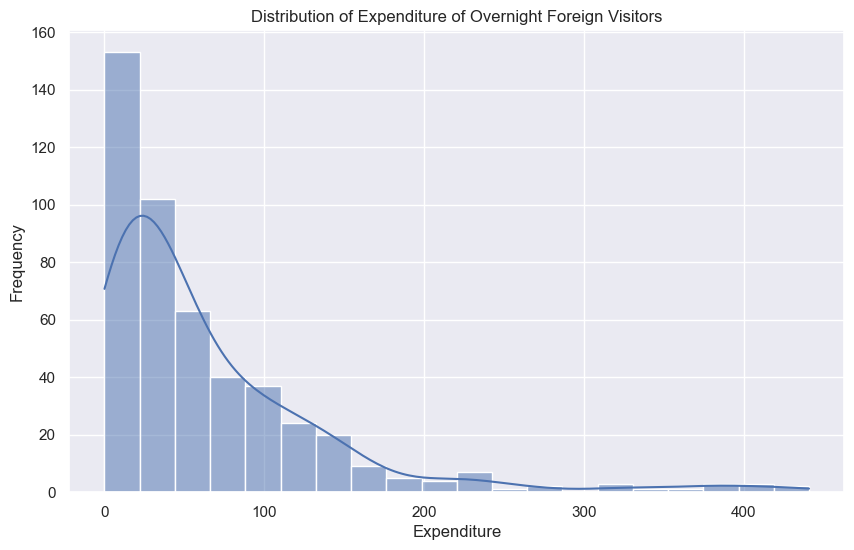

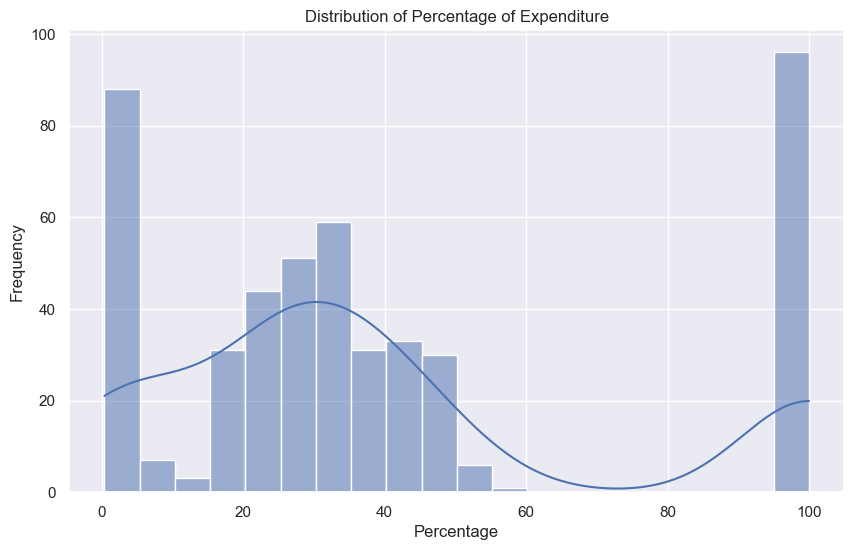

In [1924]:

# Distribution of Expenditure of Overnight Foreign Visitors
plt.figure(figsize=(10, 6))
sns.histplot(df_filterednew['Expenditure of Overnight Foreign Visitors (Euro Million)'], bins=20, kde=True)
plt.title('Distribution of Expenditure of Overnight Foreign Visitors')
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.show()

# Distribution of Percentage of Expenditure
plt.figure(figsize=(10, 6))
sns.histplot(df_filterednew['Percentage of Expenditure of Overnight Foreign Visitors (%)'], bins=20, kde=True)
plt.title('Distribution of Percentage of Expenditure')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


The above plots show distribution for normal expenditure and percentage expenditure. The normal expenditure shows highly skewed data.

<Figure size 1200x600 with 0 Axes>

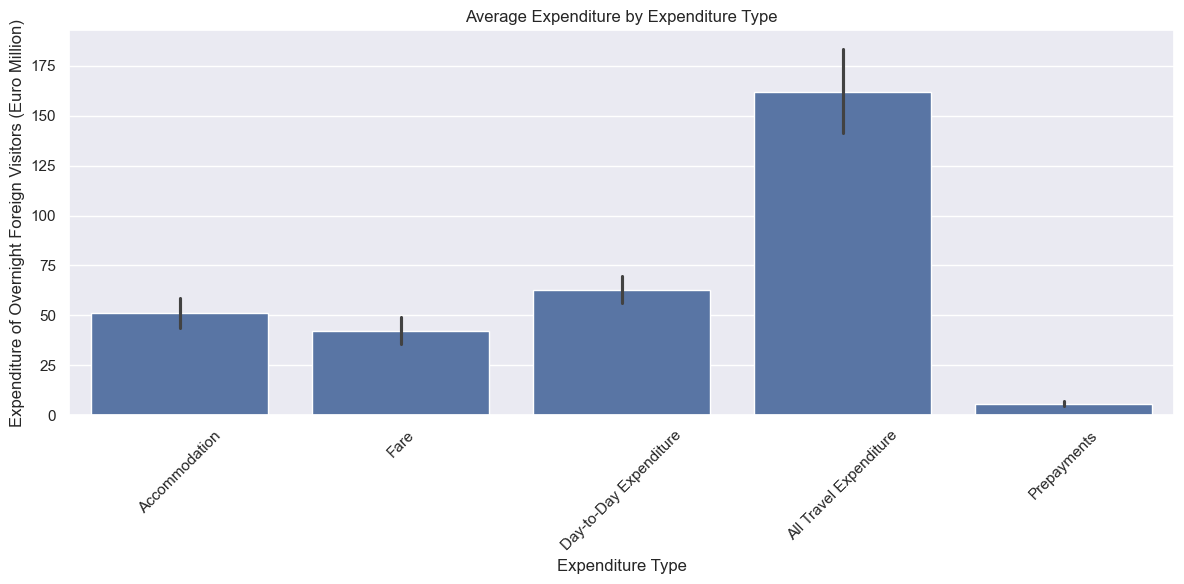

In [1928]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_filterednew, x='Expenditure Type', y='Expenditure of Overnight Foreign Visitors (Euro Million)', estimator=np.mean)
plt.title('Average Expenditure by Expenditure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above plot show that All travel expenditure amounts to highest spending. 

<Figure size 1200x600 with 0 Axes>

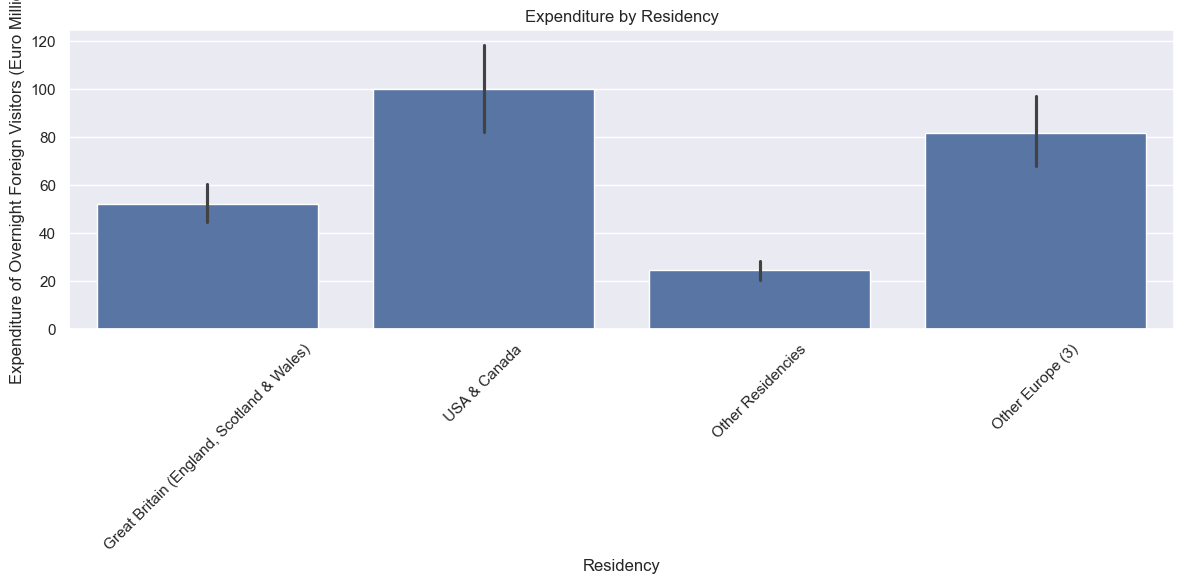

In [1938]:

plt.figure(figsize=(12,6))
sns.barplot(data=df_filterednew, x='Residency', y='Expenditure of Overnight Foreign Visitors (Euro Million)')
plt.title('Expenditure by Residency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above plot shows that USA and Canada visitors contribute to highest expenditure.

# MACHINE LEARNING FOR DATA ANALYTICS

# MACHINE LEARNING MODELS
## USING SUPERVISED LEARNING : DECISION TREES AND RANDOM FOREST

In [1003]:
# One-hot encoding for categorical columns
#df_encoded = pd.get_dummies(df_filterednew, columns=['Residency', 'Expenditure Type'], drop_first=True)
#df_encoded['Month'] = pd.to_datetime(df_encoded['Month'])
#Extracting month and year number
#df_encoded['Year'] = df_encoded['Month'].dt.year
#df_encoded['Month_Num'] = df_encoded['Month'].dt.month
#df_encoded.drop(columns='Month', inplace=True)

In [1961]:
#Define X and y
X = df_encoded.drop(columns='Expenditure of Overnight Foreign Visitors (Euro Million)')  # Features
y = df_encoded['Expenditure of Overnight Foreign Visitors (Euro Million)']  # Target


In [1963]:
#Train/test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## HYPERPARAMETER TUNING

In [1966]:
# Step 1: Define hyperparameter grids
param_grids = {
    "Decision Tree": {
        'max_depth': [4, 8, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [4, 8, 10, None],
        'max_features': ['sqrt', 'log2']  
    }
}

Explanation:
max_depth controls the depth of each tree. Using None means nodes are expanded until all leaves are pure.

min_samples_split controls the minimum number of samples required to split an internal node. Higher values prevent overfitting.

n_estimators is the number of trees in the forest (for Random Forest only).

max_features controls the number of features to consider when looking for the best split:

'sqrt' is recommended for classification

'log2' is another common choice

In [1969]:
# Step 2: Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Step 3: Store evaluation results
results = {
    "R2 Score": {},
    "MAE": {},
    "RMSE": {}
}
predictions = {}

In [1971]:

# Step 4: Train, predict, evaluate
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               cv=5, n_jobs=-1, verbose=1, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Store results
    results["R2 Score"][name] = r2_score(y_test, y_pred)
    results["MAE"][name] = mean_absolute_error(y_test, y_pred)
    results["RMSE"][name] = np.sqrt(mean_squared_error(y_test, y_pred))
    predictions[name] = y_pred

    print(f"\n{name} Best Params: {grid_search.best_params_}")
    print(f"{name} R² Score: {results['R2 Score'][name]:.3f}")
    print(f"{name} MAE: {results['MAE'][name]:.3f}")
    print(f"{name} RMSE: {results['RMSE'][name]:.3f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Decision Tree Best Params: {'max_depth': None, 'min_samples_split': 5}
Decision Tree R² Score: 0.919
Decision Tree MAE: 0.130
Decision Tree RMSE: 0.261
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Random Forest Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest R² Score: 0.939
Random Forest MAE: 0.122
Random Forest RMSE: 0.226


## COMPARISON

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

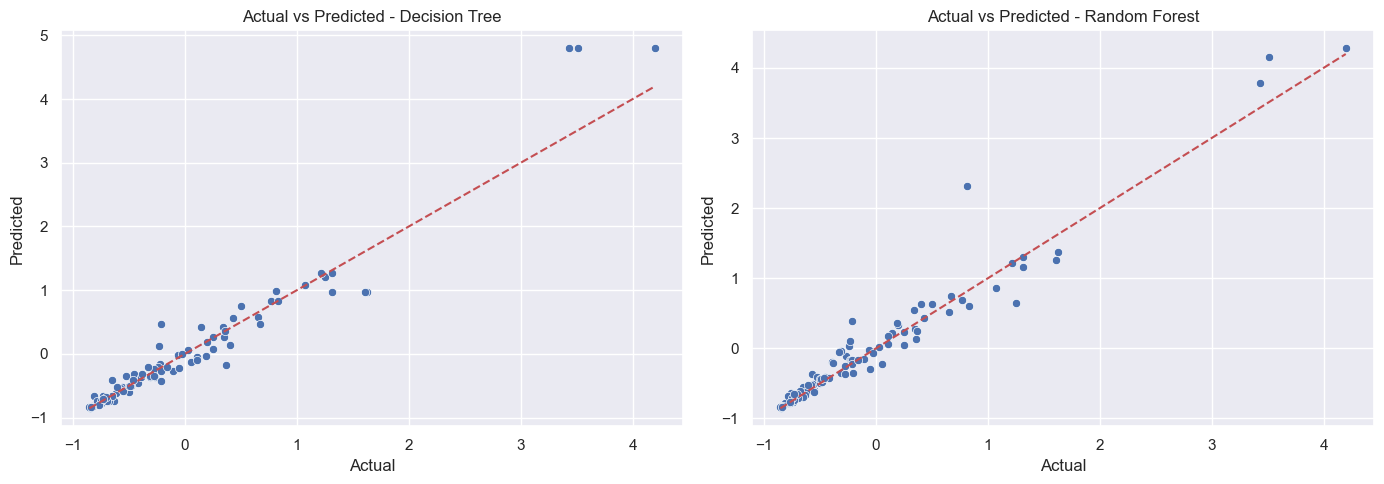


Model Performance Comparison:
          Decision Tree  Random Forest
R2 Score       0.918528       0.938910
MAE            0.129575       0.122052
RMSE           0.261495       0.226434


In [1973]:
# Step 5: Actual vs Predicted plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, name in enumerate(models.keys()):
    sns.scatterplot(x=y_test, y=predictions[name], ax=axes[i])
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[i].set_title(f'Actual vs Predicted - {name}')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Step 6: Display comparison table
comparison_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(comparison_df.T)

Comparison analysis: Random Forest outperforms Decision Tree in terms of R² Score (0.936 vs. 0.918), which means the model explains a higher proportion of the variance in the target variable.
The Mean Absolute Error (MAE) and RMSE for Random Forest are lower than for Decision Tree, suggesting more accurate predictions.
Random Forest also benefits from ensemble learning, which reduces overfitting and leads to more stable performance.
Graphical analysis: Since dots are close to the red line so	both models are performing well (predictions are close to actual values).



In [1975]:
#OPTIONAL

In [1976]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='r2')
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [1977]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None], 'n_estimators': [50, 100]},
             scoring='r2')

In [1978]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(model, X_test, y_test, name='Model'):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - R²: {r2:.3f}, MSE: {mse:.2f}")
    return r2, mse

r2_dt, mse_dt = evaluate(grid_dt.best_estimator_, X_test, y_test, 'Decision Tree')
r2_rf, mse_rf = evaluate(grid_rf.best_estimator_, X_test, y_test, 'Random Forest')


Decision Tree - R²: 0.919, MSE: 0.07
Random Forest - R²: 0.930, MSE: 0.06


# STATISTICS FOR DATA ANALYTICS

## DESCRIPTIVE STATISTICS

In [1981]:
#Original data
df=pd.read_csv("exp.csv")
df.head()

,Statistic Label,Month,Residency,Expenditure Type,UNIT,VALUE
0,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Fare,Euro Million,19.6
1,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Prepayments,Euro Million,1.0
2,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Accommodation,Euro Million,13.5
3,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",Day-to-Day Expenditure,Euro Million,45.1
4,Expenditure of Overnight Foreign Visitors,2023 January,"Great Britain (England, Scotland & Wales)",All Travel Expenditure,Euro Million,79.2


In [1982]:
#Some descriptive statistics are covered in Data preparation and Visualisation segment

From the earleir analysis, it was deduced that since data is in long format, it needs to be converted in the wide format for better analysis.
Below is the data after converting into wide format. Working to achieve this is shown in Data preparation and Visualisation segment. I will using this wide format data to write the report for STATISTICS segment. 

In [1984]:
df_wide.head()


,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
0,2023 January,All Residencies,Accommodation,65.4,164.0,19.9
1,2023 January,All Residencies,All Travel Expenditure,329.5,824.0,100.0
2,2023 January,All Residencies,Day-to-Day Expenditure,162.0,405.0,49.2
3,2023 January,All Residencies,Fare,98.4,246.0,29.9
4,2023 January,All Residencies,Prepayments,3.6,9.0,1.1


In [1985]:
# Summary statistics for numerical columns
df_wide.describe()

,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
count,650.000000,650.000000,650.000000
mean,99.156000,557.613846,40.000308
std,144.843562,560.660550,32.901367
min,0.200000,3.000000,0.400000
25%,18.800000,164.250000,19.525000
50%,47.350000,415.000000,31.500000
75%,120.900000,725.750000,46.300000
max,1097.600000,3185.000000,100.000000


In [1986]:
#To measure inter quartile range IQR
Q1 = df_wide.quantile(0.25, numeric_only=True)
Q3 = df_wide.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)


Expenditure of Overnight Foreign Visitors (Euro Million)       102.100
Mean Expenditure of Overnight Foreign Visitors (Euro)          561.500
Percentage of Expenditure of Overnight Foreign Visitors (%)     26.775
dtype: float64


In [1987]:
#To measure skewness
print(df_wide.skew(numeric_only=True))


Expenditure of Overnight Foreign Visitors (Euro Million)       3.368838
Mean Expenditure of Overnight Foreign Visitors (Euro)          1.752423
Percentage of Expenditure of Overnight Foreign Visitors (%)    0.893165
dtype: float64


Explanation: Overnight Foreign Visitors shows a high positive skew of 3.37, indicating that while most values are relatively low, there are a few very high expenditure records pulling the distribution to the right. 
Mean Expenditure per Visitor also has a positive skew of 1.75, suggesting that individual spending is generally concentrated at the lower end with some outliers spending significantly more. 
The Percentage of Expenditure shows a mild skew of 0.89, implying a more balanced distribution, though still slightly right-skewed. These findings highlight the presence of outliers and the need for robust methods or transformations when modeling.



In [1989]:
#To measure kurtosis
print(df_wide.kurt(numeric_only=True))


Expenditure of Overnight Foreign Visitors (Euro Million)       14.632748
Mean Expenditure of Overnight Foreign Visitors (Euro)           3.087939
Percentage of Expenditure of Overnight Foreign Visitors (%)    -0.426960
dtype: float64


Explanation: The Expenditure of Overnight Foreign Visitors (Euro Million) exhibits a very high kurtosis of 14.63, indicating a distribution with heavy tails and a sharp peak. This suggests the presence of extreme outliers and highly concentrated expenditure values around the mean.
The Mean Expenditure (Euro) also has leptokurtic behavior with a kurtosis of 3.09, implying a distribution more peaked than normal. 
Conversely, the Percentage of Expenditure shows a slightly platykurtic distribution with a kurtosis of -0.43, meaning it is flatter than a normal distribution and has fewer outliers.

Plotting section

In [1992]:
df_wide.head()

,Month,Residency,Expenditure Type,Expenditure of Overnight Foreign Visitors (Euro Million),Mean Expenditure of Overnight Foreign Visitors (Euro),Percentage of Expenditure of Overnight Foreign Visitors (%)
0,2023 January,All Residencies,Accommodation,65.4,164.0,19.9
1,2023 January,All Residencies,All Travel Expenditure,329.5,824.0,100.0
2,2023 January,All Residencies,Day-to-Day Expenditure,162.0,405.0,49.2
3,2023 January,All Residencies,Fare,98.4,246.0,29.9
4,2023 January,All Residencies,Prepayments,3.6,9.0,1.1


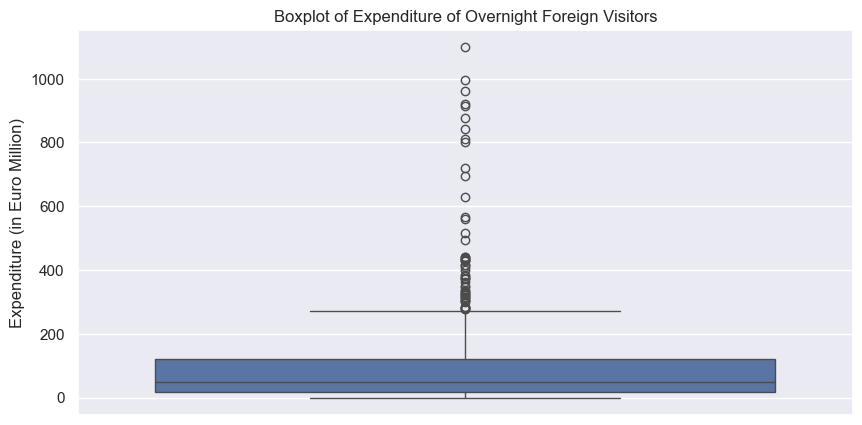

In [1993]:
#Boxplot to see outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_wide, y='Expenditure of Overnight Foreign Visitors (Euro Million)')
plt.title('Boxplot of Expenditure of Overnight Foreign Visitors')
plt.ylabel('Expenditure (in Euro Million)')
plt.show()


The boxplot reveals a few high-value outliers in the "Expenditure of Overnight Foreign Visitors" column. These could reflect seasonal surges or exceptional years (e.g., events, policy changes). However, since tree-based models are robust to outliers, we chose not to remove them.



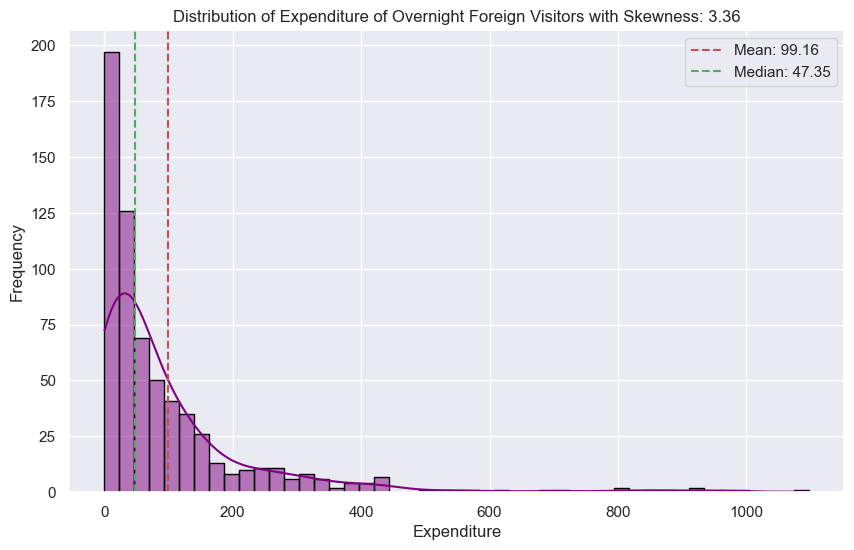

In [1999]:
#Distribution plot to observe skewness
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Select your data column
exp_d = df_wide["Expenditure of Overnight Foreign Visitors (Euro Million)"]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(exp_d, kde=True, color="purple", edgecolor="black")

# Calculate skewness
skew_value = skew(exp_d.dropna())  # Remove NaN values for skewness calculation
plt.axvline(exp_d.mean(), color='r', linestyle='--', label=f'Mean: {exp_d.mean():.2f}')
plt.axvline(exp_d.median(), color='g', linestyle='--', label=f'Median: {exp_d.median():.2f}')

# Add labels and title
plt.title(f'Distribution of Expenditure of Overnight Foreign Visitors with Skewness: {skew_value:.2f}')
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Skewness = 3.36: This suggests a right-skewed distribution, where the data is concentrated on the lower end, and the tail extends toward the higher expenditure values.

Implications: In this case, log transformation or other transformations might help make the distribution more normal (if needed for modeling). Right-skewed data can lead to models that are biased toward the higher values.

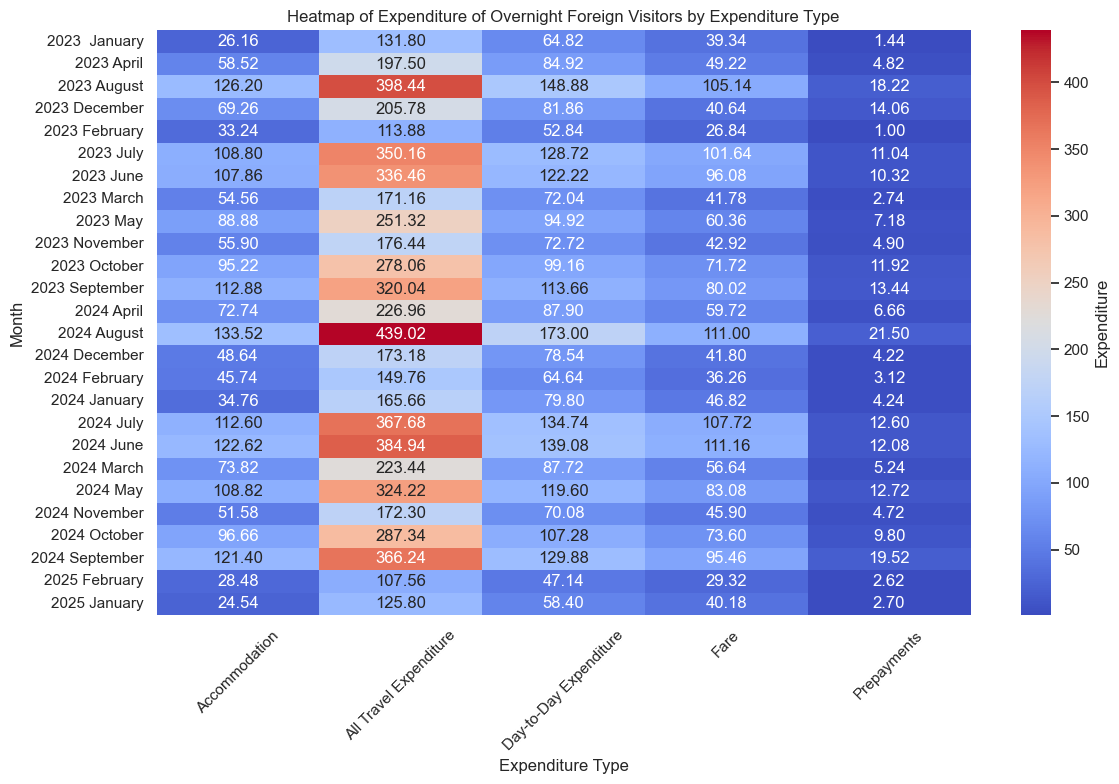

In [2001]:


# Step 1: Select the relevant columns: Month, Expenditure Type, and Expenditure-related column (e.g., Expenditure of Overnight Foreign Visitors)
df_pivot = df_wide[['Month', 'Expenditure Type', 'Expenditure of Overnight Foreign Visitors (Euro Million)']]

# Step 2: Pivot the data to create a matrix (Month as rows, Expenditure Type as columns)
df_pivot = df_pivot.pivot_table(index='Month', columns='Expenditure Type', 
                                values='Expenditure of Overnight Foreign Visitors (Euro Million)', aggfunc='mean')

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Expenditure'})
plt.title('Heatmap of Expenditure of Overnight Foreign Visitors by Expenditure Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The heatmap shows that there is a high correlation between expenditure and expenditure type of ‘all travel expenses’. The lowest correlation is between expenditure and prepayments.

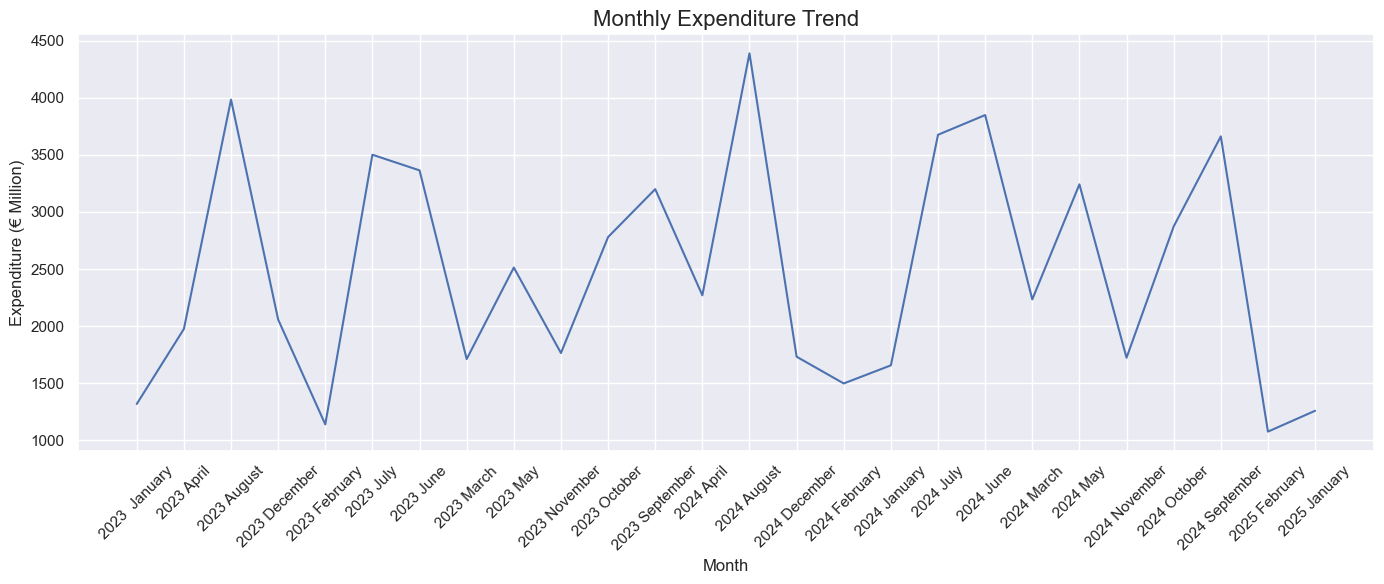

In [2013]:
#Line plot to observe mothly expenditure trend
# Convert 'Month' column to datetime (ensure proper formatting)
#df_filterednew['Month'] = pd.to_datetime(df_filterednew['Month'], format='%Y %B')

# Ensure the 'Expenditure of Overnight Foreign Visitors' is numeric
#df_filterednew['Expenditure of Overnight Foreign Visitors (Euro Million)'] = pd.to_numeric(df_filterednew['Expenditure of Overnight Foreign Visitors (Euro Million)'], errors='coerce')

# Group by month and sum expenditure for each month
monthly_expenditure = df_wide.groupby('Month')['Expenditure of Overnight Foreign Visitors (Euro Million)'].sum().reset_index()

# Plotting the total expenditure trend over months
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_expenditure, x='Month', y='Expenditure of Overnight Foreign Visitors (Euro Million)')

# Beautify the plot
plt.title('Monthly Expenditure Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Expenditure (€ Million)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


The graph shows that the highest expenditure was in July 2023 and then July 2024 with fluctuations throught the two years. This can suggest more visitors coming in summers leading to high expenditures. 

## DISCRETE DISTRIBUTION

### Using Poisson Distribution

In [2019]:
# Filter the data for Great Britain
gb_data = df_wide[df_wide['Residency'] == 'Great Britain (England, Scotland & Wales)']


In [2020]:
# Group by month and count how many GB entries there are
gb_monthly_counts = gb_data.groupby('Month').size()

# Display
print(gb_monthly_counts)


Month
2023  January     5
2023 April        5
2023 August       5
2023 December     5
2023 February     5
2023 July         5
2023 June         5
2023 March        5
2023 May          5
2023 November     5
2023 October      5
2023 September    5
2024 April        5
2024 August       5
2024 December     5
2024 February     5
2024 January      5
2024 July         5
2024 June         5
2024 March        5
2024 May          5
2024 November     5
2024 October      5
2024 September    5
2025 February     5
2025 January      5
dtype: int64


In [2021]:
# Poisson lambda (average events per time period)
lambda_gb = gb_monthly_counts.mean()

print(f"Average number of GB expenditure entries per month (λ): {lambda_gb:.2f}")


Average number of GB expenditure entries per month (λ): 5.00


In [2022]:
#Calculate Poisson Probabilities
#Example: What’s the probability of getting exactly k events (e.g., 5 entries in a month)?
from scipy.stats import poisson

# Let's say k = 5
k = 5
prob_5 = poisson.pmf(k, lambda_gb)

print(f"Probability of seeing exactly {k} entries in a month: {prob_5:.4f}")


Probability of seeing exactly 5 entries in a month: 0.1755


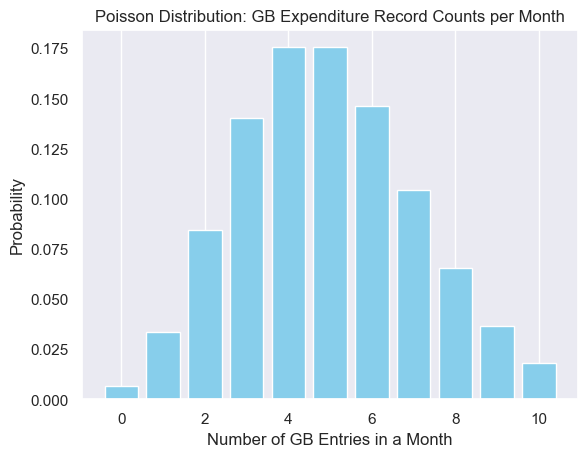

In [2023]:
#Visualize the Poisson Distribution
# Range of possible event counts
x = np.arange(0, 11)

# Poisson PMF for each x value
probs = poisson.pmf(x, mu=lambda_gb)

# Plot
plt.bar(x, probs, color='skyblue')
plt.title('Poisson Distribution: GB Expenditure Record Counts per Month')
plt.xlabel('Number of GB Entries in a Month')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.show()


Comparison: Applying Poisson Distribution on Residency with small and large samples

In [2026]:

# Count how many times each Residency appears per month
residency_counts = df_wide.groupby(['Month', 'Residency']).size().reset_index(name='Count')

# Optional: Filter for "Great Britain"
gb_counts = residency_counts[residency_counts['Residency'] == 'Great Britain (England, Scotland & Wales)']


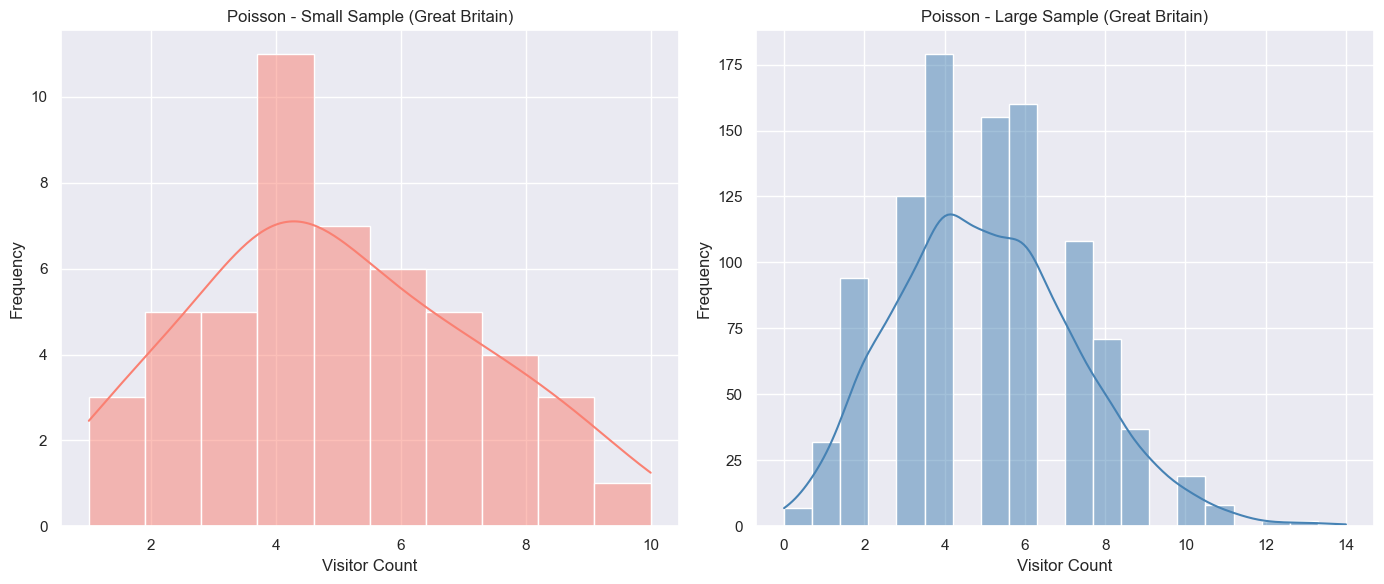

In [2027]:

# Use the mean count of Great Britain as lambda for Poisson
lambda_gb = gb_counts['Count'].mean()

# Simulate small and large samples
small_sample = np.random.poisson(lam=lambda_gb, size=50)
large_sample = np.random.poisson(lam=lambda_gb, size=1000)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(small_sample, bins=10, kde=True, color='salmon')
plt.title("Poisson - Small Sample (Great Britain)")
plt.xlabel("Visitor Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(large_sample, bins=20, kde=True, color='steelblue')
plt.title("Poisson - Large Sample (Great Britain)")
plt.xlabel("Visitor Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


From the above plots, we see that as we increase the number of months or data points, the Poisson distribution will begin to approximate a normal distribution (Central Limit Theorem). This happens because as λ (the rate of occurrence) grows, the distribution becomes smoother and less skewed. 

Additional work: Apply Poisson Distribution on Expenditure i.e. Expenditure of Overnight Foreign Visitors (Euro Million)

In [2037]:
# Calculate the overall mean expenditure to use as threshold
mean_expenditure = df_wide['Expenditure of Overnight Foreign Visitors (Euro Million)'].mean()
print(f"Mean Expenditure Threshold: {mean_expenditure:.2f}")


Mean Expenditure Threshold: 99.16


In [2038]:
# Create binary column: 1 if expenditure > mean, else 0
df_wide['HighExpenditure'] = df_wide['Expenditure of Overnight Foreign Visitors (Euro Million)'] > mean_expenditure


In [2039]:
# Group by Month and count the number of high expenditure events
high_exp_counts = df_wide.groupby('Month')['HighExpenditure'].sum()
print(high_exp_counts)


Month
2023  January      3
2023 April         7
2023 August       11
2023 December      7
2023 February      3
2023 July         10
2023 June         10
2023 March         7
2023 May           7
2023 November      7
2023 October       9
2023 September     9
2024 April         7
2024 August       13
2024 December      7
2024 February      5
2024 January       5
2024 July         12
2024 June         12
2024 March         7
2024 May          11
2024 November      7
2024 October       8
2024 September    10
2025 February      2
2025 January       3
Name: HighExpenditure, dtype: int64


In [2041]:
# λ is the average number of high expenditure events per month
lambda_high_exp = high_exp_counts.mean()
print(f"Average number of high expenditure events per month (λ): {lambda_high_exp:.2f}")


Average number of high expenditure events per month (λ): 7.65


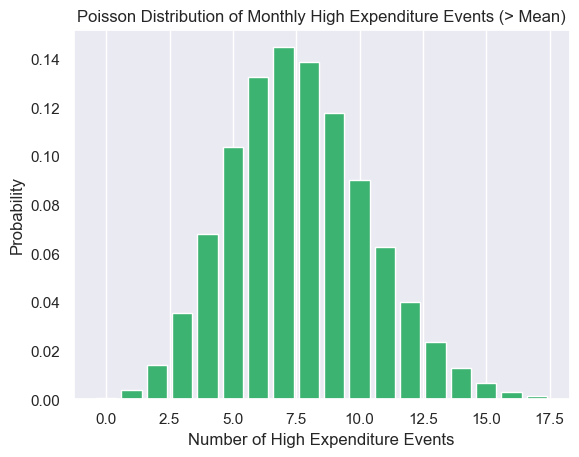

In [2042]:
# Values of k (number of events) to plot
x = np.arange(0, high_exp_counts.max() + 5)
poisson_probs = poisson.pmf(x, mu=lambda_high_exp)

# Plot
plt.bar(x, poisson_probs, color='mediumseagreen')
plt.title('Poisson Distribution of Monthly High Expenditure Events (> Mean)')
plt.xlabel('Number of High Expenditure Events')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.show()


The plot reveals which counts of high expenditure events are most probable in a typical month. For example, the peak is at 7, it means that observing 7 high expenditure events per month is most common.

## NORMAL DISTRIBUTION

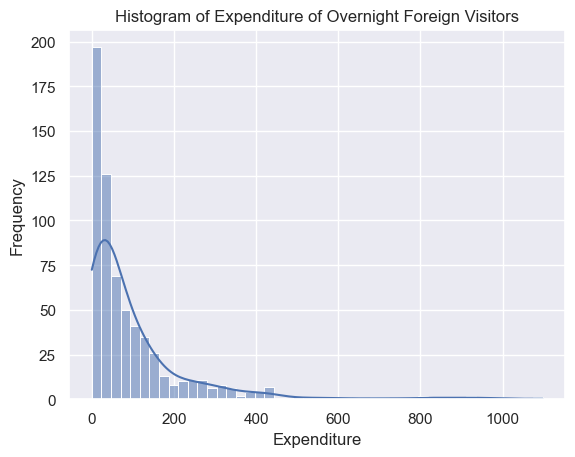

In [2050]:


# Plot histogram for a column (e.g., Expenditure of Overnight Foreign Visitors)
sns.histplot(df_wide['Expenditure of Overnight Foreign Visitors (Euro Million)'], kde=True)
plt.title('Histogram of Expenditure of Overnight Foreign Visitors')
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.show()


The histogram of Expenditure of Overnight Foreign Visitors (Euro Million) is showing a right-skewed distribution which indicates that most expenditure values are clustered at the lower end, while a few observations have exceptionally high expenditures.
This suggests that the data is not normally distributed, as a normal distribution would appear symmetric.


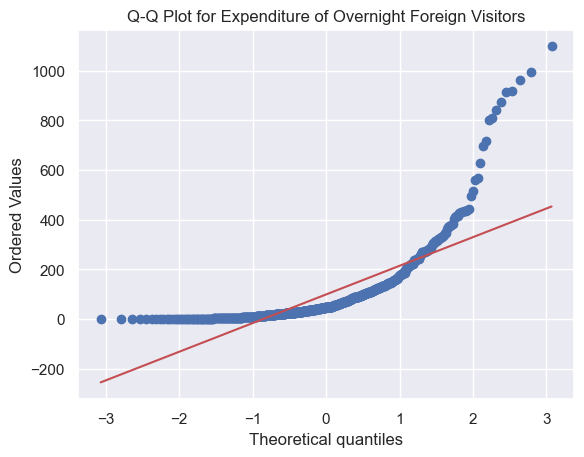

In [2052]:

#Q-Q plot for Expenditure of Overnight Foreign Visitors
stats.probplot(df_wide['Expenditure of Overnight Foreign Visitors (Euro Million)'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Expenditure of Overnight Foreign Visitors')
plt.show()


A QQ (Quantile-Quantile) plot is a graphical tool used to assess if a dataset follows a particular theoretical distribution, such as the normal distribution. The plot compares the quantiles of the observed data to the quantiles of the theoretical distribution. If the points on the QQ plot fall approximately along a straight line, this suggests that the data follows the assumed distribution. If the points deviate from the straight line, it indicates that the data does not follow the distribution.
The QQ-plot shown above also shows that data is not normally distributed. 


Another way to see normal distribution:

In [2056]:

# Extract column data
expend = df_wide["Expenditure of Overnight Foreign Visitors (Euro Million)"]

# Calculate mean (μ) and standard deviation (σ)
mu = expend.mean()
sigma = expend.std()

# Define range for x-axis (min to max stay duration)
x = np.linspace(expend.min(), expend.max(), 100)

# Compute Normal Distribution (PDF)
normal_dist = norm.pdf(x, mu, sigma)

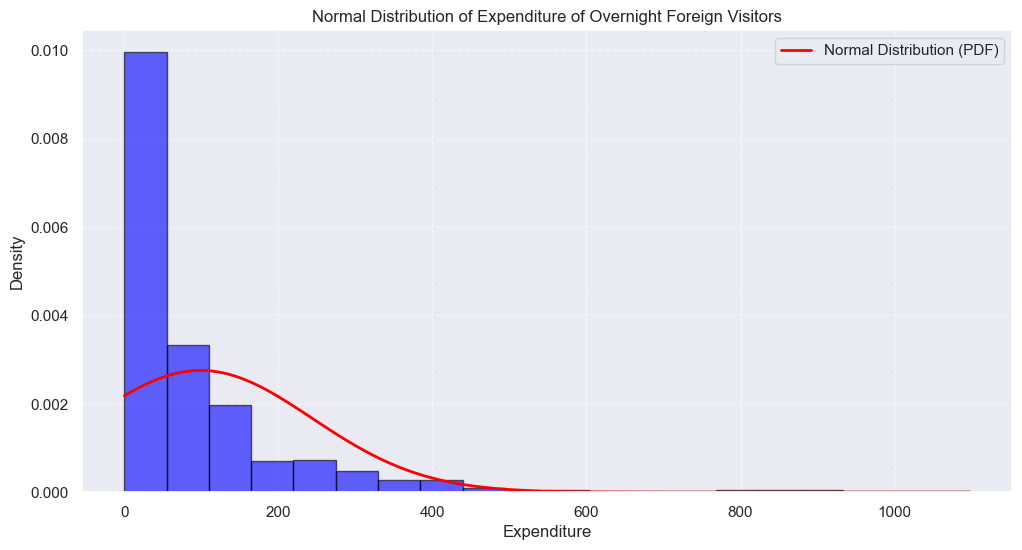

In [2059]:
# Plot histogram of actual data
plt.figure(figsize=(12, 6))
plt.hist(expend, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')

# Plot normal distribution curve
plt.plot(x, normal_dist, color='red', linewidth=2, label="Normal Distribution (PDF)")

# Labels and title
plt.xlabel("Expenditure")
plt.ylabel("Density")
plt.title("Normal Distribution of Expenditure of Overnight Foreign Visitors")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()